# Neural network
we can use autograd to implement the deep neural network, but the degree of abstraction is relatively low and need to write lots of code. torch.nn is especially designed for the deep learning scenario.the core data structure of torch.nn is Module which is an abstract concept. It can represent a layer or some layers of the neural network. It practice, we often inherit from nn.Module to write our own network. Below we will use nn.Module to write our own fully connected layer. In order to easily use pytorch for deep learning applications. Please refer to [neural network](https://github.com/chenyuntc/pytorch-book/blob/master/chapter04-neural_network/chapter4.ipynb) for detailed information.

In [1]:
import torch as t
from torch import nn

In [3]:
class Linear(nn.Module): #inherit from nn.Module
    def __init__(self, in_features, out_features):
        '''
        nn.Parameter is a special kind of Tensor, but the default state of requires_grad is True
        '''
        super(Linear, self).__init__()
        self.w = nn.Parameter(t.randn(in_features, out_features))
        self.b = nn.Parameter(t.randn(out_features))
    def forward(self, x):
        '''
        we don't need to write backward function, nn.Module can use autograd mechanism to implement backward
        propagation which is easier than Function
        '''
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [6]:
layer = Linear(4,3)
input = t.randn(2,4)
output = layer(input)
output

tensor([[ 3.4417, -0.3663,  0.5191],
        [ 2.0947,  0.9110, -0.0344]], grad_fn=<AddBackward0>)

In [8]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[ 0.4737, -0.3460,  0.7304],
        [ 1.8482,  1.0975, -0.2864],
        [ 2.3423,  0.5572,  0.5583],
        [-1.4022,  0.9495, -0.1570]], requires_grad=True)
b Parameter containing:
tensor([ 0.0465, -1.3441,  0.1073], requires_grad=True)


In [9]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features) # 此处的Linear是前面自定义的全连接层
        self.layer2 = Linear(hidden_features, out_features)
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [10]:
perceptron = Perceptron(3,4,1)
'''
the submodules name will be taken as prefix to the submodules paramters' name
'''
for name, param in perceptron.named_parameters():
    print(name, param.size())

layer1.w torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.w torch.Size([4, 1])
layer2.b torch.Size([1])


## Most often used neural network layers
### Image related layers
Image related layers include convolution, pool etc, There are AvgPool, MaxPool, AdaptiveAvgPool etc in Pool methods. Beside the often used convolution layer, TransposeConv layer is also important in some scenarios.

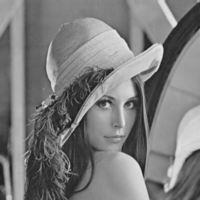

In [12]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()
lena = Image.open('imgs/lena.png')
lena

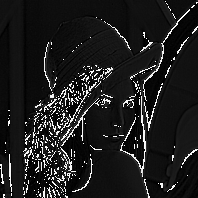

In [13]:
input = to_tensor(lena).unsqueeze(0)
# sharpen conv kernel
kernel = t.ones(3,3)/-9.
kernel[1][1] = 1
conv = nn.Conv2d(1,1,(3,3), 1, bias=False)
conv.weight.data = kernel.view(1,1,3,3)
out = conv(input)
to_pil(out.data.squeeze(0))

Pooling layer can be viewed as a special kind of convolution layer, it can be used as downsampling function. There are no parameters needed to learn in pooling layer. it's weight is static.

In [15]:
pool = nn.AvgPool2d(2,2)
list(pool.parameters())

[]

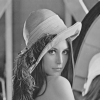

In [16]:
out = pool(input)
to_pil(out.data.squeeze())

Besides the convolution and pooling layers, deep learning applications also often use following layers:  
Linear: fully connected layers  
BatchNorm: besides the standard BatchNorm layer, InstanceNorm is often used in style tranfer scenarios  
Dropout: dropout layer, it is used to counter the overfitting problems.  

In [18]:
# input batch_size=2 and dimension = 3
input = t.randn(2,3)
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[-0.5291, -1.0706, -0.1042,  0.2738],
        [-0.2044, -0.8652,  0.8036,  0.6858]], grad_fn=<AddmmBackward>)